<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_week9_NN_PyTorch_allMarkdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications

## Week 9: Deep Neural Networks with Pytorch
### Prof. Charles Dorner, EdD (Candidate)
### College of Computing and Informatics, Drexel University

## Data representations for neural networks

In general, all current neural network systems use tensors as their basic data structure.

### What’s a tensor?

- A tensor is a container for data.
- For example, matrices are 2D tensors.
- Tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis).
- In deep learning, we generally manipulate tensors that are 0D to 4D, with the possibilit of going up to 5D for video data.



> Here's a figure visualizing tensors:
![tensors](https://res.cloudinary.com/practicaldev/image/fetch/s--VaxrSdrA--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/bp6ux6ppf5t5amwkxklq.jpg)



### Key Attributes of Tensors:

A tensor is defined by three key attributes:

- Number of axes (rank)—For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.

- Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape  (3,5) , and the 3D tensor example has shape  (3,3,5) . A vector has a shape with a single element, such as  (5,) , whereas a scalar has an empty shape,  () .

- Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation.

# Deep Neural Networks with PyTorch

```
import numpy as np
import pandas as pd
import matplotlib
import torch
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import torch

## What is PyTorch?
- PyTorch is a scalable and multiplatform programming interface for implementing and running machine learning algorithms, including convenience wrappers for deep learning.
- PyTorch was primarily developed by the researchers and engineers from the Facebook AI Research (FAIR) lab.
- PyTorch was initially released in September
2016 and is free and open source under the modified BSD license. - PyTorch has been adopted to develop deep learning
solutions, such as Tesla Autopilot, Uber’s Pyro, and Hugging Face’s Transformers (https://pytorch.org/ecosystem/).

### Creating tensors in PyTorch

```
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)
```

In [2]:


a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)



tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


```
rand_tensor = torch.rand(2,3)

print(rand_tensor)
```

In [3]:


rand_tensor = torch.rand(2,3)

print(rand_tensor)



tensor([[0.4760, 0.9393, 0.3624],
        [0.3755, 0.1906, 0.6702]])


### Creating a PyTorch DataLoader from existing tensors

```
from torch.utils.data import DataLoader
```

In [4]:
from torch.utils.data import DataLoader


```
t = torch.arange(6, dtype=torch.float32)

data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)
```

In [5]:


t = torch.arange(6, dtype=torch.float32)

data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)



batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


## Build a NN for Image Classification with PyTorch

### Fetching available datasets from the torchvision.datasets library

```
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
```

In [6]:


import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor



```
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
```

In [7]:


# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)



100%|██████████| 26.4M/26.4M [00:02<00:00, 12.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.31MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.2MB/s]


```
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)
```

In [8]:


# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)



```
training_data.classes
```

In [9]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

```
# Get the training dataset size
print(f"Number of training images in training_data: {len(training_data)}")

# Get shape of one image
image, label = training_data[0]  # Get the first image
print(f"Shape of one training image: {image.shape}")  # (C, H, W) format in PyTorch
```

In [10]:


# Get the training dataset size
print(f"Number of training images in training_data: {len(training_data)}")

# Get shape of one image
image, label = training_data[0]  # Get the first image
print(f"Shape of one training image: {image.shape}")  # (C, H, W) format in PyTorch



Number of training images in training_data: 60000
Shape of one training image: torch.Size([1, 28, 28])


```
# Get test dataset size
print(f"Number of test images in test_data: {len(test_data)}")

# Get shape of one image
image, label = test_data[0]  # Get the first image
print(f"Shape of one test image: {image.shape}")  # (C, H, W) format in PyTorch
```

In [11]:


# Get test dataset size
print(f"Number of test images in test_data: {len(test_data)}")

# Get shape of one image
image, label = test_data[0]  # Get the first image
print(f"Shape of one test image: {image.shape}")  # (C, H, W) format in PyTorch



Number of test images in test_data: 10000
Shape of one test image: torch.Size([1, 28, 28])


```
from matplotlib import pyplot as plt

# Class labels for FashionMNIST
class_names = training_data.classes  # List of class names

# Plot the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    image, label = training_data[i]  # Get image and label
    #ax.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension & plot
    ax.imshow(image.squeeze())
    ax.set_title(class_names[label])  # Set title to class name
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()
```

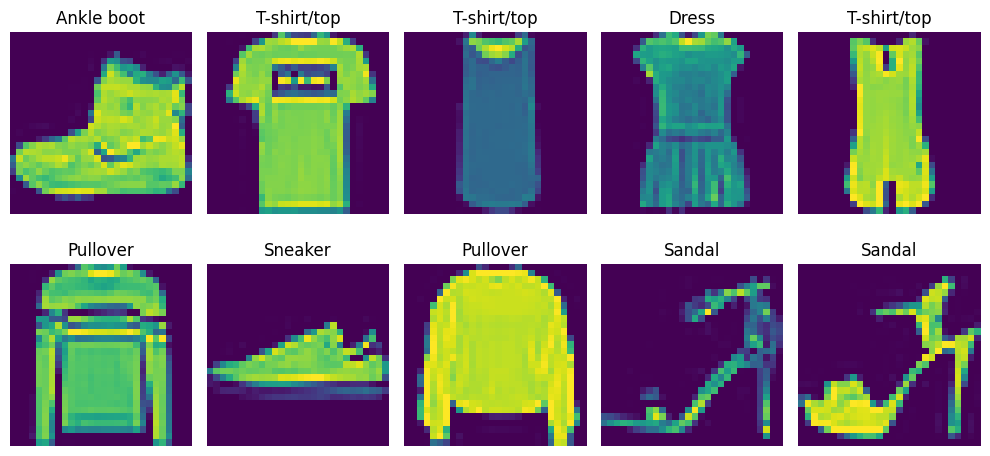

In [12]:


from matplotlib import pyplot as plt

# Class labels for FashionMNIST
class_names = training_data.classes  # List of class names

# Plot the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    image, label = training_data[i]  # Get image and label
    #ax.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension & plot
    ax.imshow(image.squeeze())
    ax.set_title(class_names[label])  # Set title to class name
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()



### Create DataLoader for Pytorch model
- We pass the Dataset as an argument to DataLoader.
- This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading.

```
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of one batch X [N, C, H, W]: {X.shape}")
    print(f"Shape of one batch y: {y.shape} {y.dtype}")
    break
```

In [13]:


batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of one batch X [N, C, H, W]: {X.shape}")
    print(f"Shape of one batch y: {y.shape} {y.dtype}")
    break



Shape of one batch X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of one batch y: torch.Size([64]) torch.int64


## Retrieval Practice

### Creating Models
- To define a neural network in PyTorch, we create a class that inherits from nn.Module.
- We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function.
- To accelerate operations in the neural network, we move it to the accelerator such as CUDA, MPS, MTIA, or XPU. If the current accelerator is available, we will use it. Otherwise, we use the CPU.

```
# If you have a compatible version, use 'device' instead of 'accelerator'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")
```

In [14]:


# If you have a compatible version, use 'device' instead of 'accelerator'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")



Using cuda device


```
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)
```

In [15]:


# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)



NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Optimizing the Model Parameters
- To train a model, we need a loss function and an optimizer.

```
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
```

In [16]:


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)



### Define the Training and Test Routines
- In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

```
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # set on training mode
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
```

In [17]:


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # set on training mode
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



- We also check the model’s performance against the test dataset to ensure it is learning.

```
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    # set on evaluation mode
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
```

In [18]:


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    # set on evaluation mode
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



### Start to Train and Test

```
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")
```

In [19]:


epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")



Epoch 1
-------------------------------
loss: 2.296378  [   64/60000]
loss: 2.296646  [ 6464/60000]
loss: 2.272938  [12864/60000]
loss: 2.264373  [19264/60000]
loss: 2.255218  [25664/60000]
loss: 2.212987  [32064/60000]
loss: 2.227054  [38464/60000]
loss: 2.186961  [44864/60000]
loss: 2.191264  [51264/60000]
loss: 2.154482  [57664/60000]
Test Error: 
 Accuracy: 41.0%, Avg loss: 2.150254 

Epoch 2
-------------------------------
loss: 2.162153  [   64/60000]
loss: 2.158315  [ 6464/60000]
loss: 2.093404  [12864/60000]
loss: 2.109377  [19264/60000]
loss: 2.064711  [25664/60000]
loss: 1.993534  [32064/60000]
loss: 2.031686  [38464/60000]
loss: 1.945985  [44864/60000]
loss: 1.962792  [51264/60000]
loss: 1.884828  [57664/60000]
Test Error: 
 Accuracy: 58.5%, Avg loss: 1.879992 

Epoch 3
-------------------------------
loss: 1.914995  [   64/60000]
loss: 1.890745  [ 6464/60000]
loss: 1.762603  [12864/60000]
loss: 1.808974  [19264/60000]
loss: 1.704699  [25664/60000]
loss: 1.646247  [32064/600

### Save the Model

```
torch.save(model.state_dict(), "./model")
print("Saved PyTorch Model State to ./model")
```

In [20]:


torch.save(model.state_dict(), "./model")
print("Saved PyTorch Model State to ./model")



Saved PyTorch Model State to ./model


### Load the Saved Model

```
model_loaded = NeuralNetwork().to(device)
model_loaded.load_state_dict(torch.load("./model", weights_only=True))
```

In [21]:


model_loaded = NeuralNetwork().to(device)
model_loaded.load_state_dict(torch.load("./model", weights_only=True))



<All keys matched successfully>

### Make Predictions

```
# define the classes
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
```

In [22]:


# define the classes
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]



```
# set the evaluation mode
model_loaded.eval()
```

In [23]:


# set the evaluation mode
model_loaded.eval()



NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

```
# test on a single image
x, y = test_data[5][0], test_data[5][1]
plt.imshow(x.squeeze())
plt.show()
print(f"Label: {classes[y]}")
```

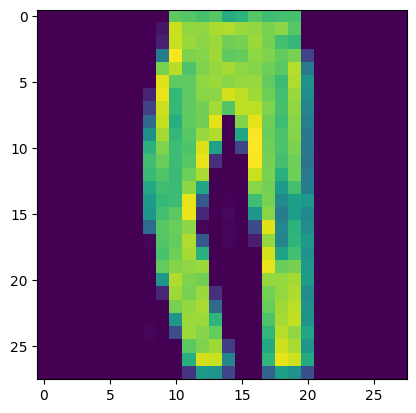

Label: Trouser


In [24]:


# test on a single image
x, y = test_data[5][0], test_data[5][1]
plt.imshow(x.squeeze())
plt.show()
print(f"Label: {classes[y]}")



```
with torch.no_grad():
    x = x.to(device)
    pred = model_loaded(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
```

In [25]:


with torch.no_grad():
    x = x.to(device)
    pred = model_loaded(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')



Predicted: "Trouser", Actual: "Trouser"
